#### What is the Efficient Frontier and Capital Allocation Line?

Efficient Frontier: A curved line that represents the set of optimal portfolios offering the highest expected return for each level of risk (measured by standard deviation). Every point on this frontier represents a portfolio that cannot be improved upon - you can't get higher returns without taking more risk, or lower risk without accepting lower returns.

Capital Allocation Line (CAL): A straight line that shows all possible combinations of a riskfree asset (like Treasury bills) and a risky portfolio. The optimal CAL is tangent to the efficient frontier, and this tangent point represents the optimal risky portfolio.

- Slope of CAL = Sharpe Ratio of the risky portfolio
- The point where CAL touches the efficient frontier = Tangency Portfolio

#### Why is This Important?
- Helps you build optimal portfolios.
- Shows trade-off between risk and return.
- Investors with different risk tolerance can choose appropriate portfolios on the efficient frontier or CAL.
- The tangency portfolio is theoretically the best risk-adjusted portfolio.

#### Formulae

Portfolio Return:

\begin{equation*}
R_p=\sum w_i \cdot R_i
\end{equation*}


Portfolio Volatility:

\begin{equation*}
\sigma_p=\sqrt{w^T \cdot \Sigma \cdot w}
\end{equation*}


Where:
- $w$ : vector of portfolio weights
- $\Sigma$ : covariance matrix of asset returns

Sharpe Ratio:

\begin{equation*}
\text { Sharpe Ratio }=\frac{R_p-R_f}{\sigma_p}
\end{equation*}



### Test - 1

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

# Step 1: Download historical price data
end = dt.datetime.now()
start = end - dt.timedelta(days=365 * 5)
assets = ["MSFT", "QQQ", "INTC", "SPY"]
assets = ["MSFT", "JNJ", "XOM", "JPM"] 
df = yf.download(assets, start=start, end=end, auto_adjust=False)["Adj Close"]

# Step 2: Calculate daily returns
returns = df.pct_change().dropna()

[*********************100%***********************]  4 of 4 completed


In [2]:
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1254 entries, 2020-06-02 to 2025-05-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1254 non-null   float64
 1   JPM     1254 non-null   float64
 2   MSFT    1254 non-null   float64
 3   XOM     1254 non-null   float64
dtypes: float64(4)
memory usage: 49.0 KB


In [3]:
num_portfolios = 10_000
risk_free_rate = 0.03

mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

mean_annual_returns = mean_daily_returns * 252
cov_annual = cov_matrix * 252


In [4]:
results = np.zeros((num_portfolios, 3))  # Return, Volatility, Sharpe
weights_record = []
for i in range(num_portfolios):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)  # Make sure weights add up to 1
    weights_record.append(weights)

    portfolio_return = np.dot(weights, mean_annual_returns)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev

    results[i] = [portfolio_return, portfolio_std_dev, sharpe_ratio]


In [5]:
results_df = pd.DataFrame(results, columns=["Return", "Volatility", "Sharpe"])
weights_df = pd.DataFrame(weights_record, columns=assets)


In [6]:
max_sharpe_idx = results_df["Sharpe"].idxmax() #best risk-adjusted return
max_sharpe_port = results_df.loc[max_sharpe_idx]
tangency_weights = weights_df.loc[max_sharpe_idx]
print(max_sharpe_idx)
print(max_sharpe_port)
print(tangency_weights)

1612
Return        0.245755
Volatility    0.200070
Sharpe        1.078398
Name: 1612, dtype: float64
MSFT    0.004035
JNJ     0.360455
XOM     0.364719
JPM     0.270791
Name: 1612, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_34436\1184707228.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_port[1],      # x: volatility
C:\Users\HP\AppData\Local\Temp\ipykernel_34436\1184707228.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_port[0],      # y: return


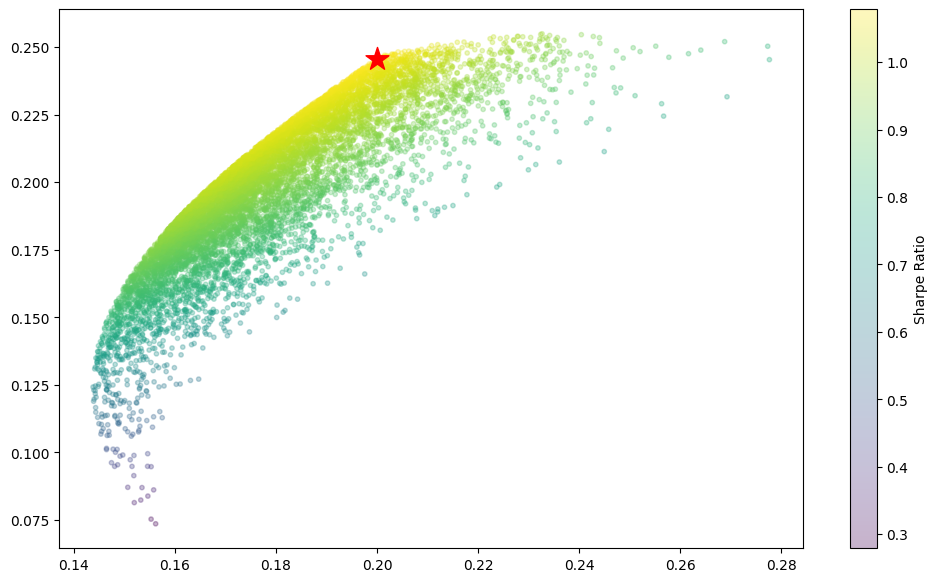

In [7]:
plt.figure(figsize=(12, 7))
plt.scatter(
    results_df["Volatility"],      # x-axis: risk
    results_df["Return"],          # y-axis: return
    c=results_df["Sharpe"],        # color based on Sharpe Ratio
    cmap="viridis",                # color map style (green to purple)
    s=10,                          # size of each point
    alpha=0.3                      # transparency of points
)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(
    max_sharpe_port[1],      # x: volatility
    max_sharpe_port[0],      # y: return
    color="red",             # dot color
    marker="*",              # star-shaped marker
    s=300,                   # much larger size
    label="Tangency Portfolio"  # legend label
)


C:\Users\HP\AppData\Local\Temp\ipykernel_34436\2040886661.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_port[1],      # x: volatility
C:\Users\HP\AppData\Local\Temp\ipykernel_34436\2040886661.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_sharpe_port[0],      # y: return


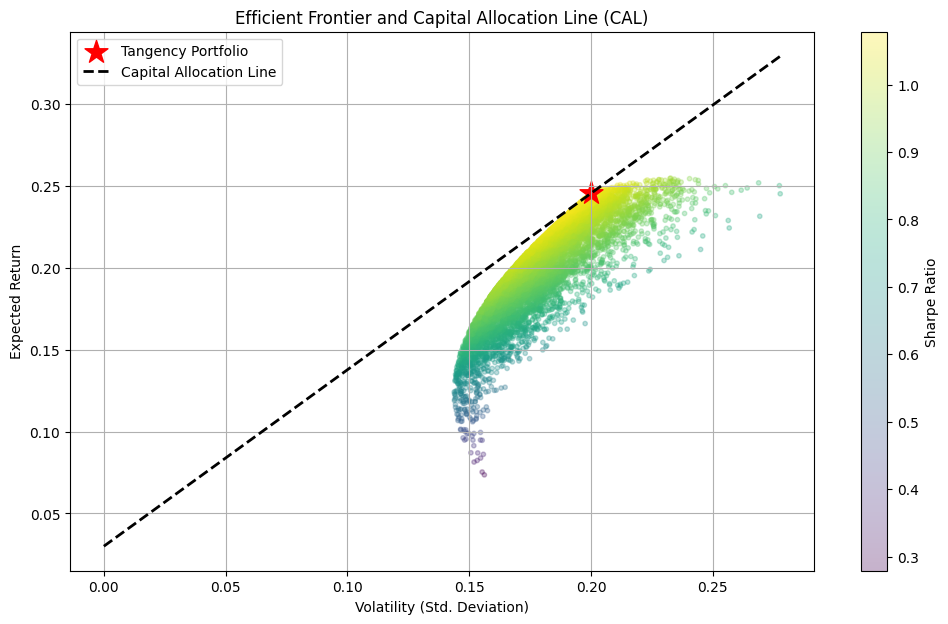

In [8]:
plt.figure(figsize=(12, 7))
plt.scatter(
    results_df["Volatility"],      # x-axis: risk
    results_df["Return"],          # y-axis: return
    c=results_df["Sharpe"],        # color based on Sharpe Ratio
    cmap="viridis",                # color map style (green to purple)
    s=10,                          # size of each point
    alpha=0.3                      # transparency of points
)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(
    max_sharpe_port[1],      # x: volatility
    max_sharpe_port[0],      # y: return
    color="red",             # dot color
    marker="*",              # star-shaped marker
    s=300,                   # much larger size
    label="Tangency Portfolio"  # legend label
)

x = np.linspace(0, max(results_df["Volatility"]), 100)
cal = risk_free_rate + (max_sharpe_port["Sharpe"] * x)
plt.plot(x, cal, color="black", linestyle="--", linewidth=2, label="Capital Allocation Line")
plt.title("Efficient Frontier and Capital Allocation Line (CAL)")
plt.xlabel("Volatility (Std. Deviation)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.savefig("eff_font1.png", dpi=300)
plt.show()


## Test - 2

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

In [23]:
# Step 1: Download and prepare data
print("Step 1: Downloading stock data...")
end = dt.datetime.now()
start = end - dt.timedelta(days=365 * 5)
stocks = ["MSFT", "JNJ", "XOM", "JPM"] 
stocks = ["MSFT", "QQQ", "INTC", "JPM"]

# Download data
df = yf.download(stocks, start=start, end=end, auto_adjust=False)

# Use adjusted close prices
prices = df['Adj Close'].dropna()
print(f"Downloaded data for {len(prices)} trading days")
print(f"Stocks: {list(prices.columns)}")

Step 1: Downloading stock data...


[*********************100%***********************]  4 of 4 completed

Downloaded data for 1255 trading days
Stocks: ['INTC', 'JPM', 'MSFT', 'QQQ']


In [24]:
# Step 2: Calculate returns and statistics

# Calculate daily returns
daily_returns = prices.pct_change().dropna()
print(f"\nDaily returns shape: {daily_returns.shape}")
print("\nFirst 5 rows of daily returns:")
print(daily_returns.head())

# Annualize returns and volatility (252 trading days per year)
annual_returns = daily_returns.mean() * 252
annual_volatility = daily_returns.std() * np.sqrt(252)
correlation_matrix = daily_returns.corr()
covariance_matrix = daily_returns.cov() * 252  # Annualized

print("Annual Returns:")
for stock, ret in annual_returns.items():
    print(f"{stock}: {ret:.2%}")

print("\nAnnual Volatility:")
for stock, vol in annual_volatility.items():
    print(f"{stock}: {vol:.2%}")


Daily returns shape: (1254, 4)

First 5 rows of daily returns:
Ticker          INTC       JPM      MSFT       QQQ
Date                                              
2020-06-01 -0.017003  0.013257 -0.002292  0.003000
2020-06-02  0.004203  0.003347  0.011377  0.006708
2020-06-03 -0.003059  0.053978  0.002434  0.004499
2020-06-04  0.016793  0.020811 -0.013164 -0.007013
2020-06-05  0.021756  0.045002  0.023398  0.019827
Annual Returns:
INTC: -10.67%
JPM: 26.47%
MSFT: 23.08%
QQQ: 19.55%

Annual Volatility:
INTC: 43.29%
JPM: 26.58%
MSFT: 27.17%
QQQ: 23.67%


In [25]:
# Calculate mean returns and covariance matrix
mean_returns = daily_returns.mean() * 252  # Annualize (252 trading days)
cov_matrix = daily_returns.cov() * 252     # Annualize covariance

print("\nAnnualized Expected Returns:")
for stock in stocks:
    print(f"{stock}: {mean_returns[stock]:.4f} ({mean_returns[stock]*100:.2f}%)")

print(f"\nAnnualized Volatility (Standard Deviation):")
volatility = np.sqrt(np.diag(cov_matrix))

for i, stock in enumerate(stocks):
    print(f"{stock}: {volatility[i]:.4f} ({volatility[i]*100:.2f}%)")

print(f"\nCovariance Matrix:")
print(cov_matrix)



Annualized Expected Returns:
MSFT: 0.2308 (23.08%)
QQQ: 0.1955 (19.55%)
INTC: -0.1067 (-10.67%)
JPM: 0.2647 (26.47%)

Annualized Volatility (Standard Deviation):
MSFT: 0.4329 (43.29%)
QQQ: 0.2658 (26.58%)
INTC: 0.2717 (27.17%)
JPM: 0.2367 (23.67%)

Covariance Matrix:
Ticker      INTC       JPM      MSFT       QQQ
Ticker                                        
INTC    0.187396  0.037572  0.049261  0.056698
JPM     0.037572  0.070663  0.020469  0.026434
MSFT    0.049261  0.020469  0.073837  0.054048
QQQ     0.056698  0.026434  0.054048  0.056030


In [26]:
# Step 4: Define portfolio functions

def portfolio_return(weights, mean_returns):
    """
    Calculate portfolio expected return
    Formula: E(Rp) = Σ(wi × E(Ri))
    """
    return np.sum(weights * mean_returns)

def portfolio_volatility(weights, cov_matrix):
    """
    Calculate portfolio volatility (standard deviation)
    Formula: σp = √(w^T × Σ × w)
    """
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return np.sqrt(portfolio_variance)

def portfolio_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.02):
    """
    Calculate Sharpe ratio
    Formula: Sharpe = (E(Rp) - Rf) / σp
    """
    ret = portfolio_return(weights, mean_returns)
    vol = portfolio_volatility(weights, cov_matrix)
    return (ret - risk_free_rate) / vol

In [27]:
# Test with equal weights
print("Testing functions with equal weights (25% each):")
equal_weights = np.array([0.25, 0.25, 0.25, 0.25])
test_return = portfolio_return(equal_weights, mean_returns)
test_volatility = portfolio_volatility(equal_weights, cov_matrix)
test_sharpe = portfolio_sharpe_ratio(equal_weights, mean_returns, cov_matrix)

print(f"Equal-weight portfolio return: {test_return:.4f} ({test_return*100:.2f}%)")
print(f"Equal-weight portfolio volatility: {test_volatility:.4f} ({test_volatility*100:.2f}%)")
print(f"Equal-weight portfolio Sharpe ratio: {test_sharpe:.4f}")

Testing functions with equal weights (25% each):
Equal-weight portfolio return: 0.1461 (14.61%)
Equal-weight portfolio volatility: 0.2341 (23.41%)
Equal-weight portfolio Sharpe ratio: 0.5386


In [28]:
# Step 5: Generate random portfolios for efficient frontier
num_portfolios = 10000
num_assets = len(stocks)

# Arrays to store results
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatilities = np.zeros(num_portfolios)
portfolio_weights = np.zeros((num_portfolios, num_assets))

np.random.seed(42)  # For reproducible results
for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(num_assets)
    weights = weights / np.sum(weights)  # Normalize to sum to 1
    
    # Store weights
    portfolio_weights[i] = weights
    
    # Calculate return and volatility
    portfolio_returns[i] = portfolio_return(weights, mean_returns)
    portfolio_volatilities[i] = portfolio_volatility(weights, cov_matrix)

print(f"Generated {num_portfolios} random portfolios")
print(f"Return range: {portfolio_returns.min():.4f} to {portfolio_returns.max():.4f}")
print(f"Volatility range: {portfolio_volatilities.min():.4f} to {portfolio_volatilities.max():.4f}")

Generated 10000 random portfolios
Return range: -0.0816 to 0.2548
Volatility range: 0.2089 to 0.4089


#### What is the Minimum Variance Portfolio?
The Minimum Variance Portfolio (MVP) is the portfolio that has the lowest possible risk (volatility) among all possible portfolio combinations. It's a crucial reference point in Modern Portfolio Theory.

#### Importance
- The MVP is the leftmost point on the efficient frontier
- No portfolio can exist to the left of this point (lower risk)
- It defines the minimum risk boundary for all possible portfolios
- Some investors care only about minimizing risk, not maximizing return
- The MVP gives the safest possible portfolio combination
- It's the answer to: "What's the least risky way to diversify my money?"
- The MVP volatility is usually lower than any individual asset
- Proves that combining assets can reduce risk below the minimum single-asset risk

#### Example
Imagine you have 3 assets:
- Stock A: 15\% return, 25\% volatility
- Stock B: $12 \%$ return, 20\% volatility
- Stock C: 8\% return, 15\% volatility

Without optimization, you might think Stock C is safest (15\% volatility).
With MVP optimization, you might find:
- $30 \%$ Stock A + 45\% Stock B + 25\% Stock C = 12\% volatility
- This is lower risk than any individual stock!

In [37]:
def minimize_variance(weights):
    return portfolio_volatility(weights, cov_matrix)

# Constraints: weights sum to 1
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
# Bounds: each weight between 0 and 1 (no short selling)
bounds = tuple((.15, .35) for _ in range(num_assets))
# Initial guess: equal weights
initial_guess = np.array([1/num_assets] * num_assets)

# Optimize
min_var_result = minimize(minimize_variance, initial_guess, 
                         method='SLSQP', bounds=bounds, constraints=constraints)

min_var_weights = min_var_result.x
min_var_return = portfolio_return(min_var_weights, mean_returns)
min_var_volatility = portfolio_volatility(min_var_weights, cov_matrix)

print("Minimum Variance Portfolio:")
for i, stock in enumerate(stocks):
    print(f"{stock}: {min_var_weights[i]:.4f} ({min_var_weights[i]*100:.2f}%)")
print(f"Expected Return: {min_var_return:.4f} ({min_var_return*100:.2f}%)")
print(f"Volatility: {min_var_volatility:.4f} ({min_var_volatility*100:.2f}%)")

Minimum Variance Portfolio:
MSFT: 0.1500 (15.00%)
QQQ: 0.3500 (35.00%)
INTC: 0.1926 (19.26%)
JPM: 0.3074 (30.74%)
Expected Return: 0.1812 (18.12%)
Volatility: 0.2186 (21.86%)


#### If the risk-free rate is 3%, what mix of risky assets gives me the best reward for the risk I'm taking?

In [38]:
# Step 7: Find maximum Sharpe ratio portfolio (tangency portfolio)

risk_free_rate = 0.03  # 2% risk-free rate
print(f"Using risk-free rate: {risk_free_rate:.2%}")

def negative_sharpe_ratio(weights):
    return -portfolio_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate)

# Optimize for maximum Sharpe ratio
max_sharpe_result = minimize(negative_sharpe_ratio, initial_guess,
                           method='SLSQP', bounds=bounds, constraints=constraints)

max_sharpe_weights = max_sharpe_result.x
max_sharpe_return = portfolio_return(max_sharpe_weights, mean_returns)
max_sharpe_volatility = portfolio_volatility(max_sharpe_weights, cov_matrix)
max_sharpe_ratio = portfolio_sharpe_ratio(max_sharpe_weights, mean_returns, cov_matrix, risk_free_rate)

print("Maximum Sharpe Ratio Portfolio (Tangency Portfolio):")
for i, stock in enumerate(stocks):
    print(f"{stock}: {max_sharpe_weights[i]:.4f} ({max_sharpe_weights[i]*100:.2f}%)")
print(f"Expected Return: {max_sharpe_return:.4f} ({max_sharpe_return*100:.2f}%)")
print(f"Volatility: {max_sharpe_volatility:.4f} ({max_sharpe_volatility*100:.2f}%)")
print(f"Sharpe Ratio: {max_sharpe_ratio:.4f}")

Using risk-free rate: 3.00%
Maximum Sharpe Ratio Portfolio (Tangency Portfolio):
MSFT: 0.1500 (15.00%)
QQQ: 0.3500 (35.00%)
INTC: 0.3500 (35.00%)
JPM: 0.1500 (15.00%)
Expected Return: 0.1868 (18.68%)
Volatility: 0.2198 (21.98%)
Sharpe Ratio: 0.7132


In [39]:
# Step 8: Generate efficient frontier

def efficient_portfolio(target_return):
    """Find the minimum variance portfolio for a given target return"""
    constraints = [
        {'type': 'eq', 'fun': lambda x: portfolio_return(x, mean_returns) - target_return},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    ]
    
    result = minimize(minimize_variance, initial_guess,
                     method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Generate target returns from min variance to maximum possible return
min_ret = min_var_return
max_ret = mean_returns.max()
target_returns = np.linspace(min_ret, max_ret, 50)

efficient_returns = []
efficient_volatilities = []

print(f"Calculating efficient frontier for {len(target_returns)} target returns...")

for target_ret in target_returns:
    try:
        result = efficient_portfolio(target_ret)
        if result.success:
            efficient_returns.append(target_ret)
            efficient_volatilities.append(portfolio_volatility(result.x, cov_matrix))
    except:
        continue

efficient_returns = np.array(efficient_returns)
efficient_volatilities = np.array(efficient_volatilities)

print(f"Successfully calculated {len(efficient_returns)} efficient portfolios")

Calculating efficient frontier for 50 target returns...
Successfully calculated 4 efficient portfolios


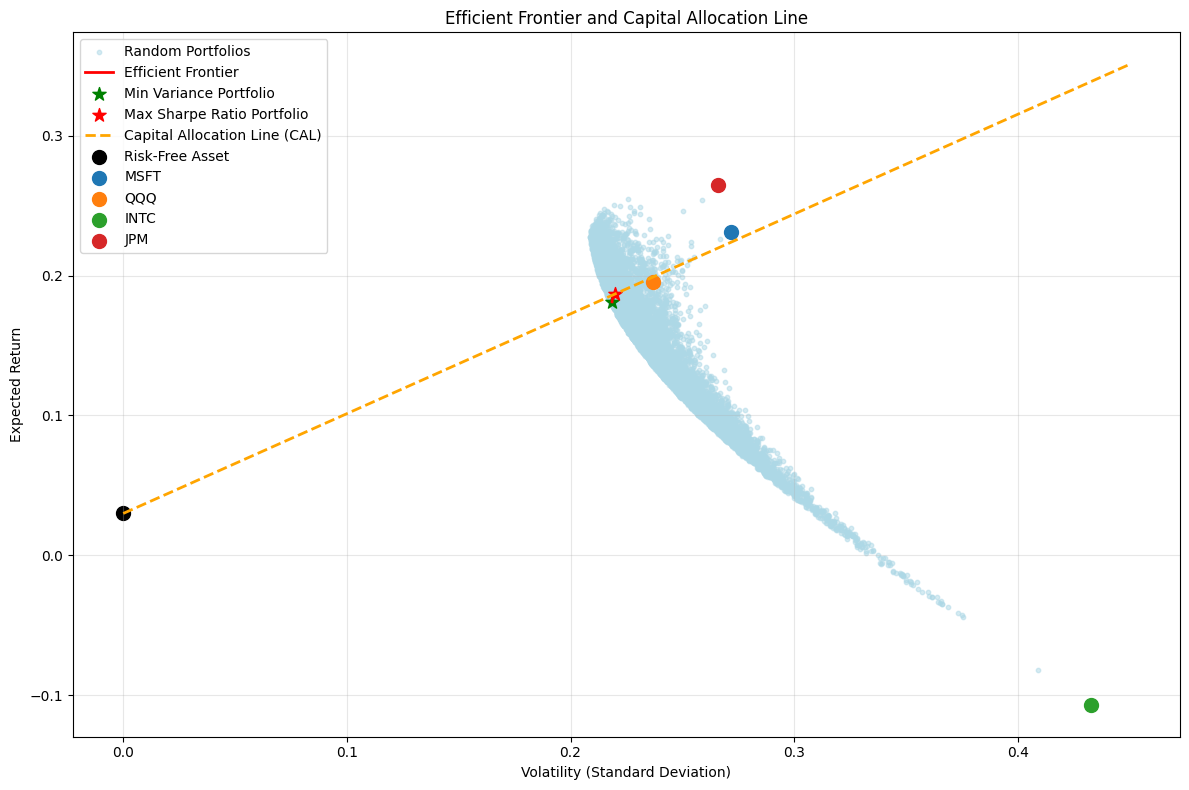

In [40]:
plt.figure(figsize=(12, 8))

# Plot random portfolios
plt.scatter(portfolio_volatilities, portfolio_returns, 
           c='lightblue', alpha=0.5, s=10, label='Random Portfolios')

# Plot efficient frontier
plt.plot(efficient_volatilities, efficient_returns, 
         'r-', linewidth=2, label='Efficient Frontier')

# Plot minimum variance portfolio
plt.scatter(min_var_volatility, min_var_return, 
           c='green', s=100, marker='*', label='Min Variance Portfolio')

# Plot maximum Sharpe ratio portfolio
plt.scatter(max_sharpe_volatility, max_sharpe_return, 
           c='red', s=100, marker='*', label='Max Sharpe Ratio Portfolio')

# Plot Capital Allocation Line
cal_x = np.linspace(0, 0.45, 100)
cal_y = risk_free_rate + (max_sharpe_return - risk_free_rate) * (cal_x / max_sharpe_volatility)
plt.plot(cal_x, cal_y, 'orange', linewidth=2, linestyle='--', 
         label=f'Capital Allocation Line (CAL)')

# Plot risk-free asset
plt.scatter(0, risk_free_rate, c='black', s=100, marker='o', label='Risk-Free Asset')

# Plot individual assets
for i, stock in enumerate(stocks):
    asset_return = mean_returns[stock]
    asset_vol = np.sqrt(cov_matrix.loc[stock, stock])
    plt.scatter(asset_vol, asset_return, s=100, label=f'{stock}')

plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier and Capital Allocation Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## try

Step 1: Downloading stock data...


[*********************100%***********************]  4 of 4 completed


Downloaded data for 1255 trading days
Stocks: ['INTC', 'MSFT', 'QQQ', 'SPY']

Step 2: Calculating returns and statistics...
Annual Returns:
INTC: -10.67%
MSFT: 23.08%
QQQ: 19.55%
SPY: 16.41%

Annual Volatility:
INTC: 43.29%
MSFT: 27.17%
QQQ: 23.67%
SPY: 17.91%

Step 3: Setting up portfolio optimization...

Step 4: Generating efficient frontier...
Successfully generated 19 efficient frontier points

Step 5: Finding optimal risky portfolio...
Optimal Risky Portfolio:
Return: 18.62%
Volatility: 19.76%
Sharpe Ratio: 0.841
Weights:
  MSFT: 0.0%
  QQQ: 33.1%
  INTC: 0.0%
  SPY: 66.9%

Step 6: Creating visualizations...


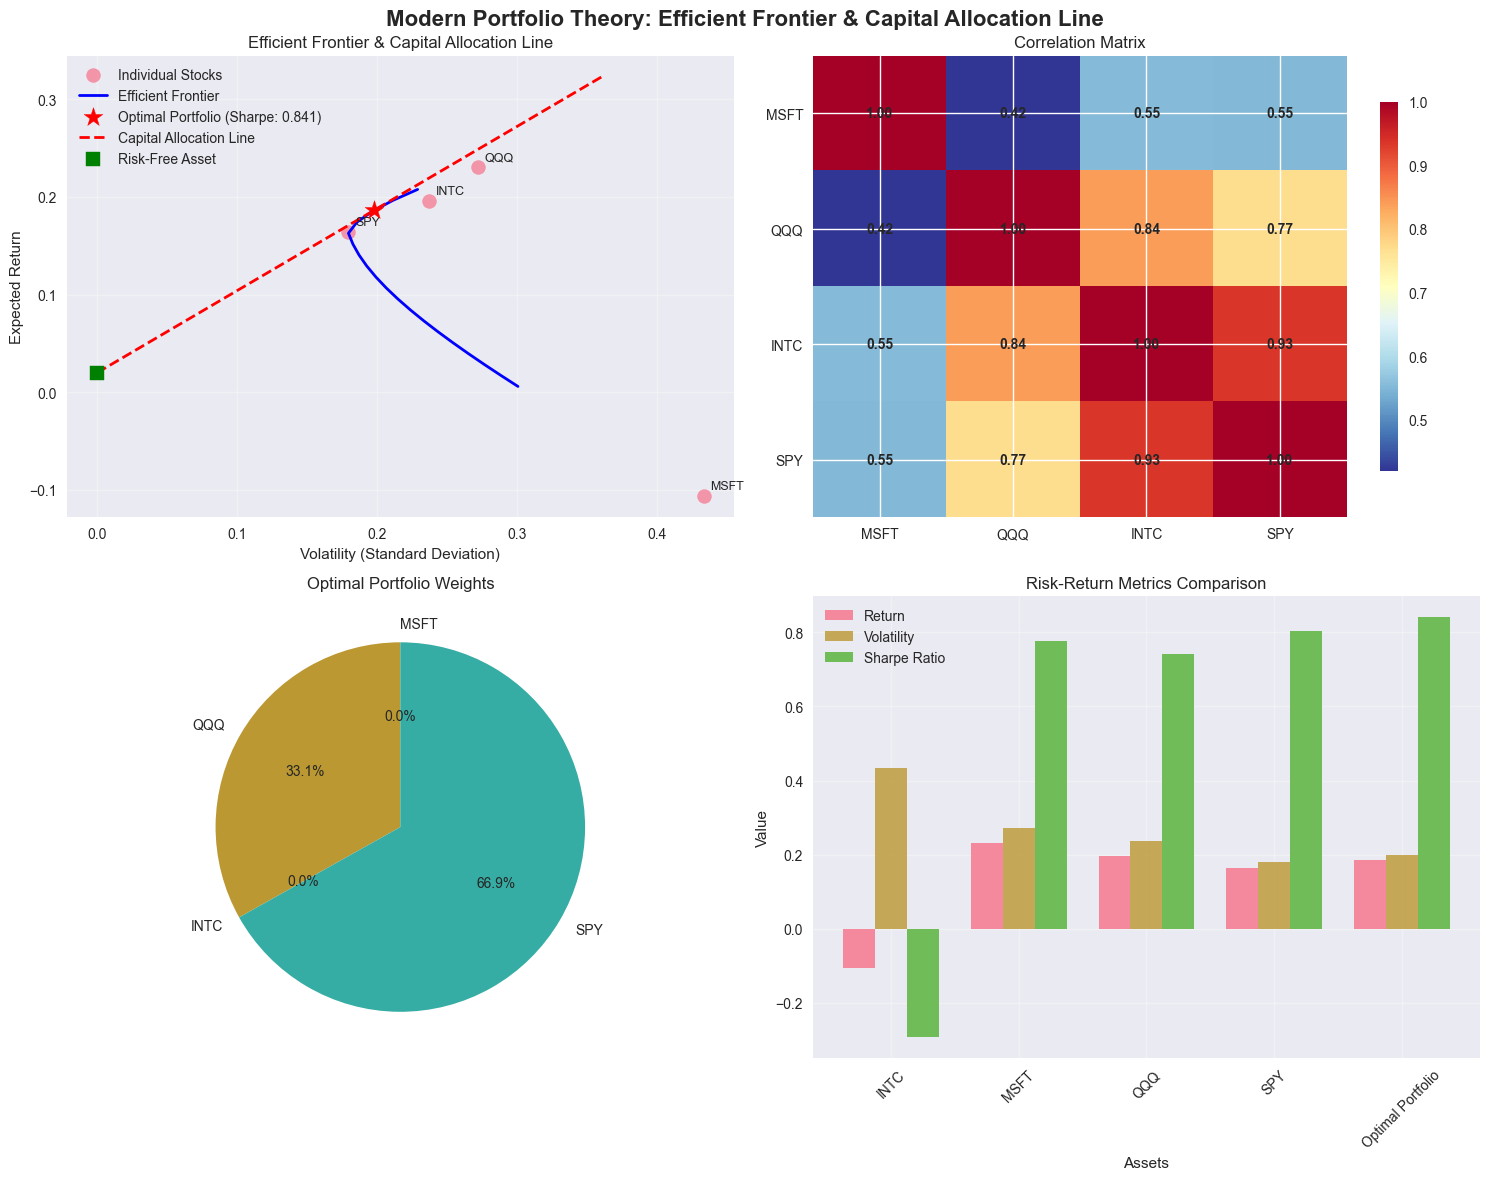


PORTFOLIO ANALYSIS SUMMARY

Risk-Free Rate: 2.00%
Analysis Period: 2020-05-29 to 2025-05-28

Optimal Risky Portfolio:
  Expected Return: 18.62%
  Volatility: 19.76%
  Sharpe Ratio: 0.841

Asset Allocation:
  MSFT: 0.0%
  QQQ: 33.1%
  INTC: 0.0%
  SPY: 66.9%

Comparison with Individual Assets:
Asset        Return   Vol      Sharpe  
----------------------------------------
MSFT         23.08%  27.17%  0.776  
QQQ          19.55%  23.67%  0.742  
INTC         -10.67% 43.29%  -0.293 
SPY          16.41%  17.91%  0.805  
Optimal      18.62%  19.76%  0.841  

Diversification Benefit:
  Equal Weight Portfolio: 12.09% return, 23.83% volatility
  Optimal Portfolio: 18.62% return, 19.76% volatility
  Volatility Reduction: 17.1%

Analysis complete! Check the plots above for visual insights.


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Step 1: Download and prepare data
print("Step 1: Downloading stock data...")
end = dt.datetime.now()
start = end - dt.timedelta(days=365 * 5)
stocks = ["MSFT", "QQQ", "INTC", "SPY"]

# Download data
df = yf.download(stocks, start=start, end=end, auto_adjust=False)

# Use adjusted close prices
prices = df['Adj Close'].dropna()
print(f"Downloaded data for {len(prices)} trading days")
print(f"Stocks: {list(prices.columns)}")

# Step 2: Calculate returns and statistics
print("\nStep 2: Calculating returns and statistics...")

# Calculate daily returns
daily_returns = prices.pct_change().dropna()

# Annualize returns and volatility (252 trading days per year)
annual_returns = daily_returns.mean() * 252
annual_volatility = daily_returns.std() * np.sqrt(252)
correlation_matrix = daily_returns.corr()
covariance_matrix = daily_returns.cov() * 252  # Annualized

print("Annual Returns:")
for stock, ret in annual_returns.items():
    print(f"{stock}: {ret:.2%}")

print("\nAnnual Volatility:")
for stock, vol in annual_volatility.items():
    print(f"{stock}: {vol:.2%}")

# Step 3: Portfolio optimization functions
print("\nStep 3: Setting up portfolio optimization...")

def portfolio_stats(weights, returns, cov_matrix):
    """Calculate portfolio return, volatility, and Sharpe ratio"""
    portfolio_return = np.sum(returns * weights)
    portfolio_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_vol

def negative_sharpe(weights, returns, cov_matrix, risk_free_rate):
    """Negative Sharpe ratio for minimization"""
    p_ret, p_vol = portfolio_stats(weights, returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_vol

def minimize_volatility(weights, returns, cov_matrix):
    """Return portfolio volatility for minimization"""
    return portfolio_stats(weights, returns, cov_matrix)[1]

# Step 4: Generate efficient frontier
print("\nStep 4: Generating efficient frontier...")

n_assets = len(stocks)
risk_free_rate = 0.02  # 2% risk-free rate assumption

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # weights sum to 1
bounds = tuple((0, 1) for _ in range(n_assets))  # long-only positions
initial_guess = np.array([1/n_assets] * n_assets)

# Generate target returns for efficient frontier
min_ret = annual_returns.min() * 1.1  # Slightly above minimum to avoid edge cases
max_ret = annual_returns.max() * 0.9  # Slightly below maximum to avoid edge cases
target_returns = np.linspace(min_ret, max_ret, 30)  # Reduced number for stability

efficient_portfolios = []
successful_optimizations = 0

for target in target_returns:
    # Add constraint for target return
    cons = [constraints,
            {'type': 'eq', 'fun': lambda x, target=target: portfolio_stats(x, annual_returns, covariance_matrix)[0] - target}]
    
    try:
        # Minimize volatility for given return
        result = minimize(minimize_volatility, initial_guess, 
                         args=(annual_returns, covariance_matrix),
                         method='SLSQP', bounds=bounds, constraints=cons,
                         options={'ftol': 1e-9, 'disp': False})
        
        if result.success:
            ret, vol = portfolio_stats(result.x, annual_returns, covariance_matrix)
            # Verify the result is reasonable
            if vol > 0 and ret > 0:
                efficient_portfolios.append([ret, vol, result.x])
                successful_optimizations += 1
    except Exception as e:
        continue  # Skip problematic optimizations

print(f"Successfully generated {successful_optimizations} efficient frontier points")

# Convert to arrays for easier handling
if len(efficient_portfolios) > 0:
    efficient_portfolios = np.array(efficient_portfolios, dtype=object)
    efficient_returns = np.array([p[0] for p in efficient_portfolios])
    efficient_volatilities = np.array([p[1] for p in efficient_portfolios])
else:
    efficient_returns = np.array([])
    efficient_volatilities = np.array([])
    print("Warning: Could not generate efficient frontier points")

# Step 5: Find optimal risky portfolio (maximum Sharpe ratio)
print("\nStep 5: Finding optimal risky portfolio...")

result_sharpe = minimize(negative_sharpe, initial_guess,
                        args=(annual_returns, covariance_matrix, risk_free_rate),
                        method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = result_sharpe.x
optimal_return, optimal_vol = portfolio_stats(optimal_weights, annual_returns, covariance_matrix)
optimal_sharpe = (optimal_return - risk_free_rate) / optimal_vol

print("Optimal Risky Portfolio:")
print(f"Return: {optimal_return:.2%}")
print(f"Volatility: {optimal_vol:.2%}")
print(f"Sharpe Ratio: {optimal_sharpe:.3f}")
print("Weights:")
for i, stock in enumerate(stocks):
    print(f"  {stock}: {optimal_weights[i]:.1%}")

# Step 6: Create visualizations
print("\nStep 6: Creating visualizations...")

# Create figure with subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Modern Portfolio Theory: Efficient Frontier & Capital Allocation Line', fontsize=16, fontweight='bold')

# Plot 1: Efficient Frontier and CAL
ax1.scatter(annual_volatility, annual_returns, s=100, alpha=0.7, label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax1.annotate(stock, (annual_volatility.iloc[i], annual_returns.iloc[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=9)

# Check if we have valid efficient frontier points
if len(efficient_volatilities) > 0:
    # Plot efficient frontier
    ax1.plot(efficient_volatilities, efficient_returns, 'b-', linewidth=2, label='Efficient Frontier')
    
    # Plot Capital Allocation Line
    max_vol = max(max(efficient_volatilities), optimal_vol) * 1.2
else:
    print("Warning: Could not generate efficient frontier. Using alternative approach...")
    max_vol = optimal_vol * 2

# Plot optimal portfolio
ax1.scatter(optimal_vol, optimal_return, s=200, c='red', marker='*', 
           label=f'Optimal Portfolio (Sharpe: {optimal_sharpe:.3f})', zorder=5)

# Plot Capital Allocation Line
cal_volatilities = np.linspace(0, max_vol, 100)
cal_returns = risk_free_rate + optimal_sharpe * cal_volatilities
ax1.plot(cal_volatilities, cal_returns, 'r--', linewidth=2, label='Capital Allocation Line')

# Risk-free asset point
ax1.scatter(0, risk_free_rate, s=100, c='green', marker='s', label='Risk-Free Asset', zorder=5)

ax1.set_xlabel('Volatility (Standard Deviation)')
ax1.set_ylabel('Expected Return')
ax1.set_title('Efficient Frontier & Capital Allocation Line')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Correlation Matrix Heatmap
im = ax2.imshow(correlation_matrix, cmap='RdYlBu_r', aspect='auto')
ax2.set_xticks(range(len(stocks)))
ax2.set_yticks(range(len(stocks)))
ax2.set_xticklabels(stocks)
ax2.set_yticklabels(stocks)
ax2.set_title('Correlation Matrix')

# Add correlation values to heatmap
for i in range(len(stocks)):
    for j in range(len(stocks)):
        ax2.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontweight='bold')

plt.colorbar(im, ax=ax2, shrink=0.8)

# Plot 3: Portfolio Weights
ax3.pie(optimal_weights, labels=stocks, autopct='%1.1f%%', startangle=90)
ax3.set_title('Optimal Portfolio Weights')

# Plot 4: Risk-Return Comparison
metrics_df = pd.DataFrame({
    'Return': annual_returns,
    'Volatility': annual_volatility,
    'Sharpe': (annual_returns - risk_free_rate) / annual_volatility
})

# Add optimal portfolio
metrics_df.loc['Optimal Portfolio'] = [optimal_return, optimal_vol, optimal_sharpe]

x_pos = np.arange(len(metrics_df))
width = 0.25

ax4.bar(x_pos - width, metrics_df['Return'], width, label='Return', alpha=0.8)
ax4.bar(x_pos, metrics_df['Volatility'], width, label='Volatility', alpha=0.8)
ax4.bar(x_pos + width, metrics_df['Sharpe'], width, label='Sharpe Ratio', alpha=0.8)

ax4.set_xlabel('Assets')
ax4.set_ylabel('Value')
ax4.set_title('Risk-Return Metrics Comparison')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(metrics_df.index, rotation=45)
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Step 7: Summary statistics and insights
print("\n" + "="*60)
print("PORTFOLIO ANALYSIS SUMMARY")
print("="*60)

print(f"\nRisk-Free Rate: {risk_free_rate:.2%}")
print(f"Analysis Period: {start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}")

print(f"\nOptimal Risky Portfolio:")
print(f"  Expected Return: {optimal_return:.2%}")
print(f"  Volatility: {optimal_vol:.2%}")
print(f"  Sharpe Ratio: {optimal_sharpe:.3f}")

print(f"\nAsset Allocation:")
for i, stock in enumerate(stocks):
    print(f"  {stock}: {optimal_weights[i]:.1%}")

print(f"\nComparison with Individual Assets:")
print(f"{'Asset':<12} {'Return':<8} {'Vol':<8} {'Sharpe':<8}")
print("-" * 40)
for stock in stocks:
    ret = annual_returns[stock]
    vol = annual_volatility[stock]
    sharpe = (ret - risk_free_rate) / vol
    print(f"{stock:<12} {ret:<7.2%} {vol:<7.2%} {sharpe:<7.3f}")

print(f"{'Optimal':<12} {optimal_return:<7.2%} {optimal_vol:<7.2%} {optimal_sharpe:<7.3f}")

# Calculate diversification benefit
equal_weight_return = annual_returns.mean()
equal_weight_vol = np.sqrt(np.dot(np.array([0.25]*4), np.dot(covariance_matrix, np.array([0.25]*4))))
print(f"\nDiversification Benefit:")
print(f"  Equal Weight Portfolio: {equal_weight_return:.2%} return, {equal_weight_vol:.2%} volatility")
print(f"  Optimal Portfolio: {optimal_return:.2%} return, {optimal_vol:.2%} volatility")
print(f"  Volatility Reduction: {((equal_weight_vol - optimal_vol)/equal_weight_vol)*100:.1f}%")

print("\n" + "="*60)
print("Analysis complete! Check the plots above for visual insights.")
print("="*60)